Каждый пункт, который предлагается выполнить в рамках домашнего задания, имеет объявленную "цену" в баллах. Максимально возможная сумма – 10 баллов, а с учётом бонусных пунктов – 12 баллов. Выполнять все пункты не обязательно, можно сделать только часть. В большинстве пунктов ожидается, что вы напишете работающий код на Python; иногда надо будет писать комментарии в свободной форме – например, сравнивать несколько подходов к решению одной задачи. Там, где оставлены пустые клетки под ваши ответы, вы можете по своему усмотрению добавлять ещё клетки.

* * *

Эта лабораторная работа посвящена кластеризации. Мы будем работать с рукописными изображениями цифр, научимся их кластеризовать двумя разными методами (иерархическая кластеризация и алгоритм $K$-means), оценивать качество разбиения и выбирать оптимальное число кластеров, а также визуализировать промежуточные результаты.

# 1. Получение данных

Данные, с которыми мы будем работать, доступны в библиотеке scikit-learn (модуль называется `sklearn`) в подмодуле `datasets` через функцию, которая называется `load_digits`. Всего имеется 1797 наблюдений, каждое из них представляет чёрно-белую картинку 8 $\times$ 8 пикселей. Эти картинки – распознанные рукописные цифры от 0 до 9. Образцов написания каждой цифры дано приблизительно поровну, около 180.

Для удобства использования данных каждая картинка "развёрнута" в строку, так что NumPy-массив, в котором хранятся данные, имеет размерность 2 и величину 1797 $\times$ 64 (а не, например, размерность 3 и величину 1797 $\times$ 8 $\times$ 8). Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.

Кроме наблюдений (картинок), известны соответствующие им значения целевой переменной: какую цифру на самом деле изображает каждая картинка. Мы могли бы сразу сформулировать задачу обучения с учителем и предсказывать цифры по картинкам, но для целей этой лабораторной работы мы будем действовать по-другому: сделаем вид, что нам не известны истинные метки классов (т. е. цифры) и даже количество классов, и попробуем сгруппировать данные таким образом, чтобы качество кластеризации оказалось наилучшим, а затем посмотрим, насколько точно полученные кластеры совпадают с группами изображений одинаковых цифр.

**(0.5 балла)** Загрузите данные. Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

*Указания:*
- Как загрузить данные, объяснено в справке к функции `load_digits`.
- Размер массива хранится в атрибуте `shape`.

In [1]:
from sklearn.datasets import load_digits

In [2]:
data = load_digits()
X = data.data
y = data.target
print(X.shape)

(1797, 64)


**(1 балл)** Визуализируйте первые десять картинок, расположив их на сетке 3 $\times$ 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

*Указания:*
- Не забудьте импортировать NumPy и Matplotlib.
- Картинки 8 $\times$ 8 можно либо достать готовыми из объекта, загруженного функцией `load_digits`, либо сделать самостоятельно из строк массива `X`. Во втором случае пользуйтесь методом `reshape`.
- Чтобы изображение не было цветным, можно вызвать функцию `plt.gray`, прежде чем начать рисовать.
- Располагать картинки на сетке умеет функция `plt.subplot`. Ознакомьтесь со справкой к ней.
- По умолчанию число 0 кодирует чёрный цвет, а число 16 – белый цвет. Подумайте, как обратить цвета одной операцией над NumPy-массивом.
- Выводить картинку на экран умеет функция `plt.imshow`. Ознакомьтесь со справкой к ней.
- Если считаете нужным, можете отключить сглаживание – параметр `interpolation` у функции `plt.imshow`.
- Если считаете нужным, можете отключить деления на координатных осях. За это отвечают функции `plt.xticks` и `plt.yticks`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
PLT_COLS = 4
PLT_ROWS = 3
N_DIGITS = 10

In [5]:
images_topN = data.images[0:N_DIGITS, :, :]
print(images_topN)

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]

 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
  [ 0.  8. 13.  6. 15.  4.  0.  0.]
  [ 0.  2.  1. 13. 13.  0.  0.  0.]
  [ 0.  0.  2. 15. 11.

In [6]:
def plt_gray_invert_on_grid(image_data, ind, grid_rows=PLT_ROWS, grid_cols=PLT_COLS):
    plt.gray()    
    plt.subplot(grid_rows, grid_cols, ind + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(16 - image_data, interpolation=None)    
    

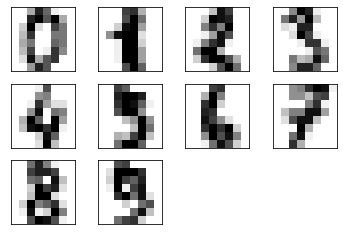

In [7]:
for i in range(N_DIGITS):
    plt_gray_invert_on_grid(images_topN[i, :, :], i)

# 2. Кластеризация и оценка качества

Мы будем использовать два популярных алгоритма: иерархическую кластеризацию и метод $K$ средних ($K$-means clustering). Эти и другие алгоритмы кластеризации доступны в библиотеке scikit-learn в подмодуле `cluster`. Иерархическая кластеризация называется `AgglomerativeClustering`, а метод $K$ средних – `KMeans`.

Интерфейс у большинства алгоритмов в scikit-learn простой и единообразный:
- Чтобы инициализировать модель, нужно создать экземпляр соответствующего класса со всеми необходимыми параметрами. Например, у кластеризаций единственный обязательный параметр называется `n_clusters`, это количество кластеров, которое мы хотим получить на выходе.
- Инициализированную модель можно обучить, вызвав метод `fit`.
- С помощью обученной модели можно предсказывать, вызывая метод `predict`.

Как видно, этот интерфейс хорош только для задач обучения с учителем, в которых чётко разделены фазы обучения модели и предсказания с её помощью. У кластеризаций зато есть метод `fit_predict`, который разбивает входную выборку на кластеры и сразу же возвращает результаты разбиения.

**(0.5 балла)** Используя каждый из двух методов, иерархическую кластеризацию и $K$ средних, получите разбиение массива `X` на 10 кластеров.

*Указания:*
- Оба раза должен получиться массив из 1797 чисел – номеров кластеров.
- `KMeans` делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр `n_init` в конструкторе.

In [8]:
from sklearn.cluster import AgglomerativeClustering, KMeans

In [9]:
N_CLUSTERS = 10

In [10]:
clust_ac_model = AgglomerativeClustering(n_clusters=N_CLUSTERS)
clusters_ac = clust_ac_model.fit_predict(X)
print(clusters_ac.shape)

(1797,)


In [11]:
clust_kmeans_model = KMeans(n_clusters=N_CLUSTERS)
clusters_kmeans = clust_kmeans_model.fit_predict(X)
print(clusters_kmeans.shape)
print(clusters_kmeans[:10])

(1797,)
[3 9 7 6 5 6 2 4 7 6]


In [12]:
clust_kmeans_model100 = KMeans(n_clusters=N_CLUSTERS, n_init=100)
clusters_kmeans100 = clust_kmeans_model100.fit_predict(X)
print(clusters_kmeans100[:10])

[1 6 6 2 4 7 8 5 7 7]


**(1 балл)** Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами. Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

*Указания:*
- Центр кластера – это среднее по всем наблюдениям, входящим в кластер, т. е. по какому-то набору строк из `X`.
- Чтобы выбрать наблюдения, входящие в кластер номер `i`, используйте индексацию по булевозначной маске. Саму маску можно получить из массива предсказанных номеров кластеров и числа `i` оператором `==`.
- Усреднять NumPy-массив вдоль какой-нибудь из осей умеет функция `np.mean`. Ознакомьтесь со справкой к ней. Нам нужно усреднение по строкам.

In [13]:
def visualise_centroids(data, clusters, n):
    for i in range(n):
        centroid = np.mean(data[clusters == i, :, :], axis=0)
        plt_gray_invert_on_grid(centroid, i)

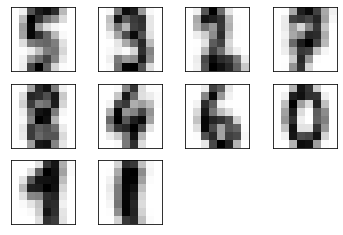

In [14]:
#визуализируем иерархическую кластеризацию
visualise_centroids(data.images, clusters_ac, N_DIGITS)

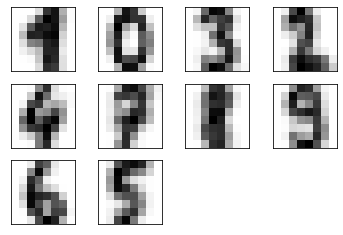

In [15]:
#визуализируем К-средних
visualise_centroids(data.images, clusters_kmeans100, N_DIGITS)

Для иерархической кластеризации отчётливо видны 6 цифр: 5, 9, 2, 7, 4, 6, 0
Для К-средних отчётливо видны 8 цифр: 6, 5, 4, 0, 7, 3, 9, 2

В ситуации, когда истинное число кластеров неизвестно, подбирают оптимальное число кластеров. При этом учитывают две величины: внутрикластерное расстояние (чем меньше, тем лучше) и межкластерное расстояние (чем больше, тем лучше). Так как две эти величины не достигают оптимума одновременно, обычно оптимизируют какой-нибудь функционал от них. Один популярный функционал называется "силуэт" (silhouette). Вот как он вычисляется.

Пусть $X$ – множество наблюдений, $M \subset X$ – один из кластеров, на которые оно разбито в результате кластеризации, $\rho$ – метрика на $X$. Выберем какое-нибудь одно наблюдение $x \in M$. Обозначим $a(x)$ среднее расстояние от $x$ до точек $x'$ из того же кластера:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Обозначим $b(x)$ минимум средних расстояний от $x$ до точек $x''$ из какого-нибудь другого кластера $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

Силуэт – это разность межкластерного и внутрикластерного расстояний, нормированная до отрезка $[-1,\, 1]$ и усреднённая по всем наблюдениям:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

В scikit-learn силуэт считается функцией `silhouette_score` из подмодуля `metrics`. На вход нужно передать массив наблюдений и результат кластеризации.

**(1.5 балла)** Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

*Указания:*
- Не забудьте, что функция `range` не захватывает правый конец диапазона.
- Под значения силуэта можно завести два списка: один для иерархической кластеризации, другой для $K$ средних.
- Рисовать графики умеет функция `plt.plot`. Ознакомьтесь со справкой к ней.
- На одной картинке можно разместить несколько графиков, это просто несколько последовательных вызовов `plt.plot`.
- Чтобы добавить легенду (подписи к графикам), можно воспользоваться функцией `plt.legend`. Местоположение легенды контролируется параметром `loc`.
- Чтобы подписать координатные оси, можно воспользоваться функциями `plt.xlabel` и `plt.ylabel`.

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
CLUSTERS_RANGE = (2, 20)
def get_clusters(data, n_clust, method):
    if method == 'ac': #AgglomerativeClustering
        model = AgglomerativeClustering(n_clusters=n_clust)
    elif method == 'kmeans':
        model = KMeans(n_clusters=n_clust, n_init=100)
    return model.fit_predict(data)

In [18]:
ac_labels = []
kmeans_labels = []
for K in range(CLUSTERS_RANGE[0], CLUSTERS_RANGE[1] + 1): 
    ac_labels.append(get_clusters(X, K, 'ac'))
    kmeans_labels.append(get_clusters(X, K, 'kmeans'))

In [19]:
silhouette_ac = []
silhouette_kmeans = []    
for K in range(CLUSTERS_RANGE[1] - CLUSTERS_RANGE[0] + 1):     
    silhouette_ac.append(silhouette_score(X, ac_labels[K][:]))
    silhouette_kmeans.append(silhouette_score(X, kmeans_labels[K][:]))

In [20]:
x_range = np.linspace(CLUSTERS_RANGE[0], CLUSTERS_RANGE[1], CLUSTERS_RANGE[1] - CLUSTERS_RANGE[0] + 1, dtype=int)

In [21]:
def plot_clustering_metrics(x=None, y1=None, y2=None, xlabel=None, ylabel=None, y1_label=None, y2_label=None, title=None):
    if y1 != None or y2 != None:
      plt.figure(figsize=(10,6))
    if y1 != None:
      plt.plot(x, y1, label=y1_label, color='red')
      x_vline1 = x[np.argmax(y1)]
      plt.axvline(x_vline1, color='red', lw=1.3, ls='--')
      plt.text(x_vline1 + 0.5, max(y1), xlabel + ' = ' + str(x_vline1))
    if y2 != None:      
      plt.plot(x, y2, label=y2_label, color='blue')
      x_vline2 = x[np.argmax(y2)]
      plt.axvline(x_vline2, color='blue', lw=1.3, ls='--')
      plt.text(x_vline2 + 0.5, max(y2), xlabel + ' = ' + str(x_vline2))
    if y1 != None or y2 != None:
      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      if y1_label != None or y2_label != None:
        plt.legend()
    if title != None:
      plt.title(title)

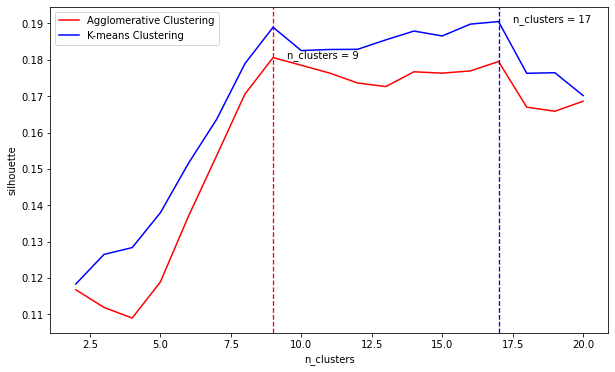

In [22]:
plot_clustering_metrics(x_range, silhouette_ac, silhouette_kmeans, xlabel='n_clusters',\
                        y1_label='Agglomerative Clustering', y2_label='K-means Clustering', ylabel='silhouette')

Когда известно "правильное" (в каком-нибудь смысле) разбиение на кластеры, результат кластеризации можно сравнить с ним, используя такие меры, как однородность (homogeneity), полнота (completeness) и их среднее гармоническое – $V$-мера. Определения этих величин довольно громоздкие и основаны на понятии [энтропии распределения вероятностей](https://ru.wikipedia.org/wiki/Информационная_энтропия); подробности излагаются в [этой статье](http://aclweb.org/anthology/D/D07/D07-1043.pdf). На практике достаточно знать, что однородность, полнота и $V$-мера заключены между нулём и единицей – чем больше, тем лучше.

Так как мы знаем, какую цифру на самом деле изображает каждая картинка (это массив `y`), мы можем использовать однородность, полноту и $V$-меру для оценки качества кластеризации. Функции для вычисления этих величин доступны в scikit-learn, в подмодуле `metrics`, под названиями `homogeneity_score`, `completeness_score`, `v_measure_score`. Как вариант, можно использовать функцию `homogeneity_completeness_v_measure`, которая возвращает сразу тройку чисел.

**(1 балл)** Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

In [23]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

In [24]:
v_measure_ac = []
v_measure_kmeans = []
for K in range(CLUSTERS_RANGE[1] - CLUSTERS_RANGE[0] + 1):    
    v_measure_ac.append(v_measure_score(y, ac_labels[K][:]))
    v_measure_kmeans.append(v_measure_score(y, kmeans_labels[K][:]))

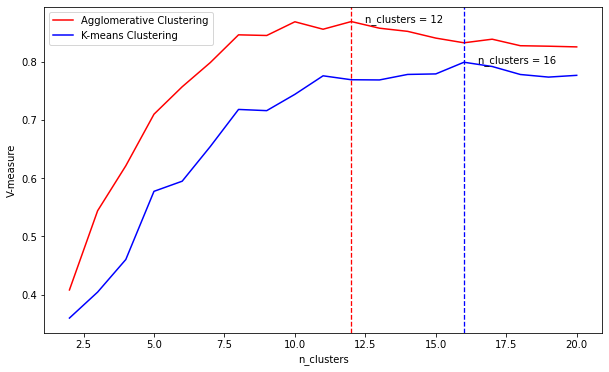

In [25]:
plot_clustering_metrics(x_range, v_measure_ac, v_measure_kmeans, xlabel='n_clusters',\
                        y1_label='Agglomerative Clustering', y2_label='K-means Clustering', ylabel='V-measure')

# 3. Снижение размерности признакового пространства

Иногда, особенно когда признаков много и не все они одинаково информативные, бывает полезно снизить размерность признакового пространства, то есть вместо $d$ исходных признаков перейти к рассмотрению $d' \ll d$ новых признаков. Данные были представлены матрицей $n$ наблюдений $\times$ $d$ исходных признаков, а теперь будут представлены матрицей $n$ наблюдений $\times$ $d'$ новых признаков.

Есть два популярных подхода к снижению размерности:
- отобрать (select) новые признаки из числа имеющихся;
- извлечь (extract) новые признаки, преобразуя старые, например, сделать $d'$ различных линейных комбинаций столбцов исходной матрицы $n \times d$.

Одним из широко используемых методов извлечения признаков является сингулярное разложение матрицы (singular value decomposition, SVD). Этот метод позволяет сконструировать любое число $d' \le d$ новых признаков таким образом, что они будут, в определённом смысле, максимально информативными. Математические детали сейчас не важны; познакомиться с ними можно, например, [здесь](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(по-русски) или [здесь](https://www.youtube.com/watch?v=P5mlg91as1c) (по-английски).

В scikit-learn есть несколько реализаций сингулярного разложения. Мы будем использовать класс `TruncatedSVD` из подмодуля `decomposition`. В конструктор этого класса достаточно передать один параметр `n_components` – желаемое число новых признаков. Метод `fit_transform` принимает матрицу и возвращает новую матрицу с таким же количеством строк, как прежде, и количеством столбцов, равным числу новых признаков.

<u>Замечание:</u> Сингулярное разложение матрицы $M$ обычно пишут в виде $M = U \Sigma V^{*}$, где $U$, $\Sigma$ и $V$ – некие матрицы с хорошими свойствами. То, что возвращает алгоритм `TruncatedSVD`, – это сколько-то (сколько мы хотим получить) первых столбцов матрицы $U$.

**(1.5 балла)** Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [26]:
from sklearn.decomposition import TruncatedSVD

In [27]:
N_FEATURES = [2, 5, 10, 20]

In [28]:
ac_labels_reduced = []
kmeans_labels_reduced = []
silhouette_ac_reduced = []
silhouette_kmeans_reduced = []
v_measure_ac_reduced = []
v_measure_kmeans_reduced = []
for n in N_FEATURES:
    reducer = TruncatedSVD(n_components=n, random_state=42)
    X_reduced = reducer.fit_transform(X)    
    ac_labels_reduced = get_clusters(X_reduced, 10, 'ac')
    kmeans_labels_reduced = get_clusters(X_reduced, 10, 'kmeans')
    silhouette_ac_reduced.append(silhouette_score(X_reduced, ac_labels_reduced))
    silhouette_kmeans_reduced.append(silhouette_score(X_reduced, kmeans_labels_reduced))
    v_measure_ac_reduced.append(v_measure_score(y, ac_labels_reduced))
    v_measure_kmeans_reduced.append(v_measure_score(y, kmeans_labels_reduced))

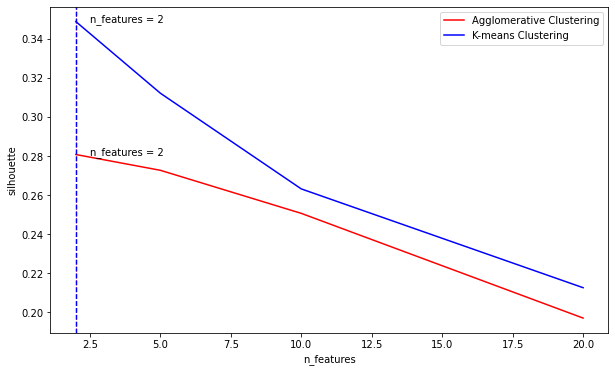

In [29]:
plot_clustering_metrics(N_FEATURES, silhouette_ac_reduced, silhouette_kmeans_reduced, xlabel='n_features',\
                        y1_label='Agglomerative Clustering', y2_label='K-means Clustering', ylabel='silhouette')    

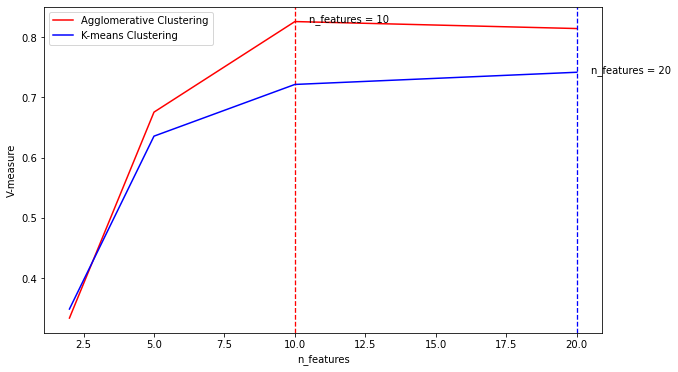

In [30]:
plot_clustering_metrics(N_FEATURES, v_measure_ac_reduced, v_measure_kmeans_reduced, xlabel='n_features',\
                        y1_label='Agglomerative Clustering', y2_label='K-means Clustering', ylabel='V-measure')

In [31]:
print(f'Full data silhouette (AgglomerativeClustering, n_clusters = 10) {silhouette_ac[10 - CLUSTERS_RANGE[0]]}')
print(f'Full data silhouette (KMeans, n_clusters = 10) {silhouette_kmeans[10 - CLUSTERS_RANGE[0]]}')
print(f'Full data V-measure (AgglomerativeClustering, n_clusters = 10) {v_measure_ac[10 - CLUSTERS_RANGE[0]]}')
print(f'Full data V-measure (KMeans, n_clusters = 10) {v_measure_kmeans[10 - CLUSTERS_RANGE[0]]}')    
print(f'Reduced data silhouette values (AgglomerativeClustering) {silhouette_ac_reduced}')
print(f'Reduced data silhouette values (KMeans) {silhouette_kmeans_reduced}')
print(f'Reduced data V-measure values (AgglomerativeClustering) {v_measure_ac_reduced}')
print(f'Reduced data V-measure values (KMeans) {v_measure_kmeans_reduced}')

Full data silhouette (AgglomerativeClustering, n_clusters = 10) 0.17849659940596496
Full data silhouette (KMeans, n_clusters = 10) 0.1825365733393292
Full data V-measure (AgglomerativeClustering, n_clusters = 10) 0.8681701126909083
Full data V-measure (KMeans, n_clusters = 10) 0.743749239793608
Reduced data silhouette values (AgglomerativeClustering) [0.28081705174878147, 0.2727414056447626, 0.2507088850960124, 0.19713225855053998]
Reduced data silhouette values (KMeans) [0.34884627212598557, 0.3121907343006207, 0.2632235648668666, 0.2126762281523765]
Reduced data V-measure values (AgglomerativeClustering) [0.3337189903948925, 0.6756036446423491, 0.8259753348813222, 0.8143882689038883]
Reduced data V-measure values (KMeans) [0.34869326518541033, 0.6357346028895932, 0.7215689584759067, 0.7418013136834264]


Значение силуэта растёт при снижении количества признаков. Вероятная причина - кластеры меньше перекрываются.
Значение V-меры не превысило значения на полных данных, но при K-means кластеризации подобралось вплотную на количестве признаков 20.

--------------------------

Другая популярная техника снижения размерности, которая особенно хорошо подходит для работы с картинками, – это алгоритм t-distributed stochastic neighbor embeddings, сокращённо tSNE. В отличие от сингулярного разложения, это преобразование нелинейное. Его основная идея – отобразить точки из пространства размерности $d$ в пространство размерности 2 или 3 (обычно 2, то есть на плоскость) таким образом, чтобы как можно точнее сохранить расстояния. Математические детали есть, например, [здесь](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), но они нетривиальны.

В библиотеке scikit-learn реализацией tSNE является класс `TSNE` в подмодуле `manifold`. В конструктор можно передать параметр `n_components`, а можно и не передавать: по умолчанию он равен 2. Метод `fit_transform` работает аналогично тому, как и у `TruncatedSVD`.

<u>Замечание:</u> В последние годы вместо tSNE на практике часто используется [UMAP](https://github.com/lmcinnes/umap), более быстрый алгоритм с похожими свойствами. В этой лабораторной работе не предлагается использовать UMAP, так как это потребовало бы установить ещё одну зависимость -- библиотеку `umap-learn`. Желающие могут проделать задания на tSNE с использованием UMAP; в этом случае обратите внимание на параметры `n_neighbors` и `min_dist`, которыми определяется вид проекции.

**(0.5 балла)** Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

*Указания:*
- Точечную диаграмму умеет рисовать функция `plt.scatter`. Ознакомьтесь со справкой к ней.
- За цвета точек отвечает параметр `c` у функции `plt.scatter`. Передать в него надо истинные метки классов.

In [32]:
from sklearn.manifold import TSNE

In [33]:
reducerTSNE = TSNE()
X_reduced_TSNE = reducerTSNE.fit_transform(X)

Text(0.5, 1.0, 'True clustering of TSNE reduced data')

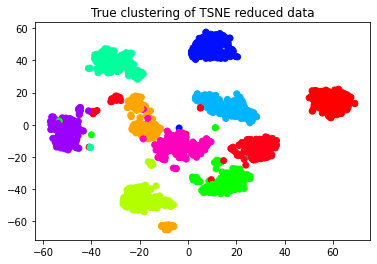

In [34]:
plt.scatter(X_reduced_TSNE[:, 0], X_reduced_TSNE[:, 1], c=y, cmap='hsv')
plt.title('True clustering of TSNE reduced data')

**(1 балл)** Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [35]:
ac_labels_TSNE = get_clusters(X_reduced_TSNE, 10, 'ac')
kmeans_labels_TSNE = get_clusters(X_reduced_TSNE, 10, 'kmeans')

In [36]:
print(f'Full data silhouette (AgglomerativeClustering, n_clusters = 10) {silhouette_ac[10 - CLUSTERS_RANGE[0]]}')
silhouette_ac_TSNE = silhouette_score(X_reduced_TSNE, ac_labels_TSNE)
print(f'TSNE reduced data silhouette AgglomerativeClustering = {silhouette_ac_TSNE}')

print(f'Full data silhouette (KMeans, n_clusters = 10) {silhouette_kmeans[10 - CLUSTERS_RANGE[0]]}')
silhouette_kmeans_TSNE = silhouette_score(X_reduced_TSNE, kmeans_labels_TSNE)
print(f'TSNE reduced data silhouette KMeans = {silhouette_kmeans_TSNE}')

print(f'Full data V-measure (AgglomerativeClustering, n_clusters = 10) {v_measure_ac[10 - CLUSTERS_RANGE[0]]}')
v_measure_ac_TSNE = v_measure_score(y, ac_labels_TSNE)
print(f'TSNE reduced data V-measure AgglomerativeClustering = {v_measure_ac_TSNE}')

print(f'Full data V-measure (KMeans, n_clusters = 10) {v_measure_kmeans[10 - CLUSTERS_RANGE[0]]}') 
v_measure_kmeans_TSNE = v_measure_score(y, kmeans_labels_TSNE)
print(f'TSNE reduced data V-measure KMeans = {v_measure_kmeans_TSNE}')

Full data silhouette (AgglomerativeClustering, n_clusters = 10) 0.17849659940596496
TSNE reduced data silhouette AgglomerativeClustering = 0.6447538137435913
Full data silhouette (KMeans, n_clusters = 10) 0.1825365733393292
TSNE reduced data silhouette KMeans = 0.6437464952468872
Full data V-measure (AgglomerativeClustering, n_clusters = 10) 0.8681701126909083
TSNE reduced data V-measure AgglomerativeClustering = 0.9224541686291711
Full data V-measure (KMeans, n_clusters = 10) 0.743749239793608
TSNE reduced data V-measure KMeans = 0.9133856292153173


Text(0.5, 1.0, 'AgglomerativeClustering illustration on TSNE reduced data')

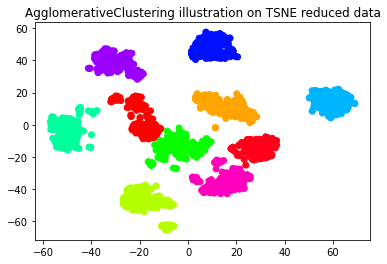

In [37]:
plt.scatter(X_reduced_TSNE[:, 0], X_reduced_TSNE[:, 1], c=ac_labels_TSNE, cmap='hsv')
plt.title('AgglomerativeClustering illustration on TSNE reduced data')

Text(0.5, 1.0, 'KMeans clustering illustration on TSNE reduced data')

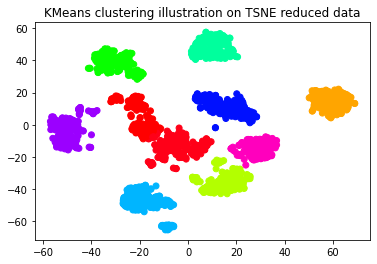

In [38]:
plt.scatter(X_reduced_TSNE[:, 0], X_reduced_TSNE[:, 1], c=kmeans_labels_TSNE, cmap='hsv')
plt.title('KMeans clustering illustration on TSNE reduced data')

TSNE-преобразование не дало улучшения только для V-меры в случае иерахической кластеризации, хотя, результат близкий к исходным данным. Во всех остальных случаях наблюдается рост параметра.

**(0.5 балла)** Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

За лучшее разбиение примем KMeans кластеризацию после TSNE-преобразования (наибольшее значение V-меры)

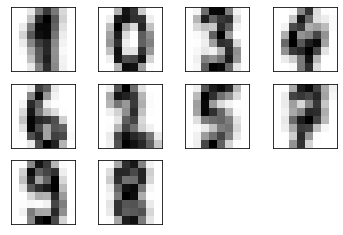

In [39]:
visualise_centroids(data.images, kmeans_labels_TSNE, N_DIGITS)

Итак, довольно отчётливо наблюдаем 10 цифр: 8, 4, 6, 0, 2, 7, 5, 3, 9, 1. По одной на кластер. 
P.S.: Из-за многократной инициализации случайными значениями кластеров, при проверке возможно отображение других центров

# 4. Итоги, бонус

**(1 балл)** Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:
- Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм $K$ средних? Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
- Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

1. Если судить по критериям оценивания качества (силуэт и V-мера), то иерархическая кластеризация даёт несколько лучшие результаты, чем К-средних.
Алгоритм К-средних, к тому же, требует многочисленных запусков с разными начальными вариантами значений центров кластеров.
2. Снижение размерности пространства признаков методом TSNE позволило улучшить качество кластеризации в нашем случае, 
подозреваю, что в более общем случае возможны варианты.

**(Бонусные 2 балла)** Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.

In [40]:
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784', version=1)
X = data.data
y = data.target

In [41]:
print(X.shape)

(70000, 784)


In [42]:
#X_reduced = reducerTSNE.fit_transform(X) - очень медленно, используем UMAP

In [43]:
from sklearn.cluster import MiniBatchKMeans

In [44]:
model = MiniBatchKMeans(n_clusters=10)
mini_km_labels = model.fit_predict(X)

In [45]:
silhouette_mini_km = silhouette_score(X, mini_km_labels)
print(silhouette_mini_km)

0.06429902116452704


In [46]:
v_measure_mini_km = v_measure_score(y, mini_km_labels)
print(v_measure_mini_km)

0.4690785944754008


Значения не очень, добавим скейлинг

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
mini_km_labels_scaled = model.fit_predict(X_scaled)

In [50]:
silhouette_mini_km_scaled = silhouette_score(X_scaled, mini_km_labels_scaled)
print(silhouette_mini_km_scaled)

0.0152408760811694


In [51]:
v_measure_mini_km_scaled = v_measure_score(y, mini_km_labels_scaled)
print(v_measure_mini_km_scaled)

0.33308607707747123


Скейлинг не помог, уменьшим количество признаков

In [52]:
from umap import UMAP

In [53]:
umap_reducer = UMAP()
X_umap = umap_reducer.fit_transform(X)

In [54]:
mini_km_labels_umap = model.fit_predict(X_umap)

In [55]:
silhouette_mini_km_umap = silhouette_score(X_umap, mini_km_labels_umap)
print(silhouette_mini_km_umap)

0.6011784


In [56]:
v_measure_mini_km_umap = v_measure_score(y, mini_km_labels_umap)
print(v_measure_mini_km_umap)

0.8914266073398056


UMAP сработал